In [135]:
import numpy as np;
print("NumPy version:", np.__version__)


NumPy version: 1.26.3


In [136]:
import tensorflow as tf;


In [137]:
import matplotlib.pyplot as plt;

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, TensorBoard

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [140]:
import seaborn as sns

In [141]:
# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [142]:
# Step 2: Normalize and preprocess the data
x_train = x_train / 255.0  # Normalize to range [0, 1]
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode labels
y_test = to_categorical(y_test, num_classes=10)

In [143]:
# Step 3: Build the MLP model with enhancements
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D vectors
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

In [144]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [145]:
# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [146]:
# Step 6: Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')


In [147]:
# Step 5: Train the model
history = model.fit(x_train, y_train, 
                    epochs=20, 
                    batch_size=64, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7698 - loss: 0.7566 - val_accuracy: 0.9472 - val_loss: 0.1781
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9239 - loss: 0.2569 - val_accuracy: 0.9572 - val_loss: 0.1397
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9442 - loss: 0.1868 - val_accuracy: 0.9661 - val_loss: 0.1095
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9510 - loss: 0.1652 - val_accuracy: 0.9687 - val_loss: 0.1051
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9555 - loss: 0.1474 - val_accuracy: 0.9721 - val_loss: 0.0931
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9615 - loss: 0.1285 - val_accuracy: 0.9733 - val_loss: 0.0866
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9638 - loss: 0.1208 - val_accuracy: 0.9728 - val_loss: 0.0854
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9624 - loss: 0.1206 - val_accuracy: 0

In [148]:
# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")







313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.0800
Test Accuracy: 97.83%


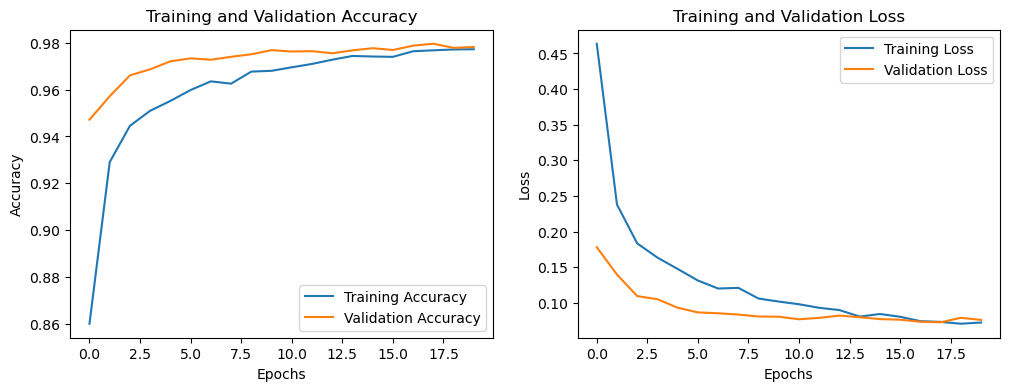

In [149]:
# Step 7: Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


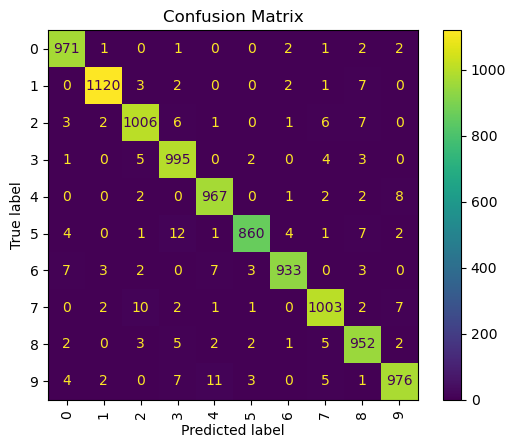

In [150]:
# Step 8: Confusion Matrix
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

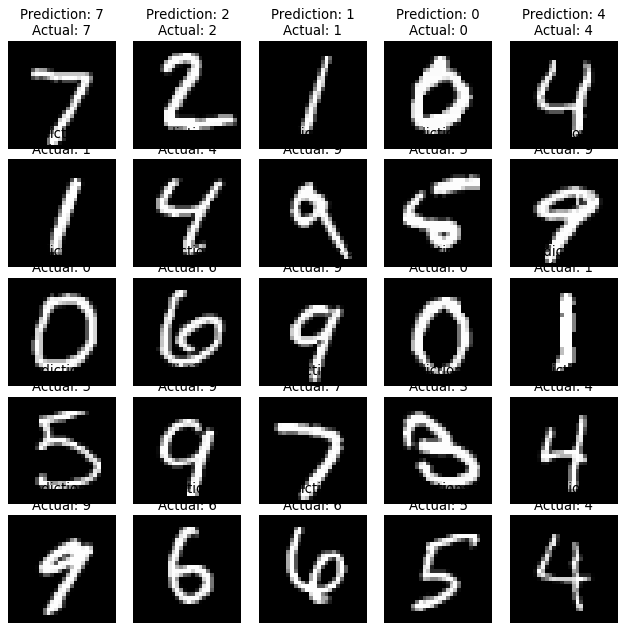

In [155]:
import matplotlib.pyplot as plt

# Define the number of rows and columns in the grid
num_images = 25  # Show 25 images (5x5 grid)
num_cols = 5  # Number of columns in the grid
num_rows = num_images // num_cols  # Number of rows

# Set up the plot grid with a smaller figure size and dpi to reduce image size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8), dpi=80)  # Adjust figsize and dpi for smaller images

# Loop through the images in the grid
for i in range(num_images):
    # Get the row and column index for this image in the grid
    row = i // num_cols
    col = i % num_cols
    
    # Plot the image
    ax = axes[row, col]
    ax.imshow(x_test_prepared[i], cmap='gray')  # Use prepared data
    ax.set_title(f"Prediction: {predicted_labels[i]}\nActual: {true_labels[i]}")
    ax.axis('off')  # Hide axes for cleaner display

# Display the grid of images with no need for scrolling
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Reduce space between images
plt.show()
